참고자료 : 공공데이터로 파이썬 데이터 분석 시작하기 - 박조은https://www.inflearn.com/course/%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%A1%9C-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D-%EC%8B%9C%EC%9E%91%ED%95%98%EA%B8%B0/dashboard


# 전국 신규 민간 아파트 분양 가격 동향

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# 최근 분양가 파일 데이터 로드

df_last = pd.read_csv('주택도시보증공사_전국 평균 분양가격(2019년 12월).csv', encoding = 'cp949')

In [5]:
df_last.shape

(4335, 5)

In [6]:
# 파일 미리보기

df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [7]:
df_last.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN
4334,제주,전용면적 102㎡초과,2019,12,3601


## 데이터셋

### 2015년 부터 최근까지의 데이터 로드

In [8]:
# encoding = "cp949" 한글 파일이 안될 경우 설정한다. 한글 인코딩 = cp949, euc-kr

df_first = pd.read_csv('전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding = 'cp949')
df_first.shape

(17, 22)

In [9]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [10]:
df_first.tail()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
12,전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
13,전남,5678,5678,5678,5696,5736,5656,5609,5780,5685,...,5768,5784,5784,5833,5825,5940,6050,6243,6286,6289
14,경북,6168,6168,6234,6317,6412,6409,6554,6556,6563,...,6881,6989,6992,6953,6997,7006,6966,6887,7035,7037
15,경남,6473,6485,6502,6610,6599,6610,6615,6613,6606,...,7125,7332,7592,7588,7668,7683,7717,7715,7723,7665
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


## 데이터 요약하기

In [11]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


### 결측치 보기

In [10]:
# 결측치 isnull, isna   True == 1, False == 0

df_last.isnull().sum() 

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [11]:
df_last.isnull() 

,지역명,규모구분,연도,월,분양가격(㎡)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
4330,False,False,False,False,False
4331,False,False,False,False,True
4332,False,False,False,False,False
4333,False,False,False,False,True


### 데이터 타입 변경

In [13]:
# 데이터 타입 변경 to_numeric

df_last["분양가격"]= pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce')
df_last["분양가격"].mean()

3238.128632802628

In [13]:
df_last.describe()

,연도,월,분양가격
count,4335.000000,4335.000000,3957.000000
mean,2017.352941,6.764706,3238.128633
std,1.234035,3.518361,1264.309933
min,2015.000000,1.000000,1868.000000
25%,2016.000000,4.000000,2441.000000
50%,2017.000000,7.000000,2874.000000
75%,2018.000000,10.000000,3561.000000
max,2019.000000,12.000000,12728.000000


### 평당분양가격 구하기

In [14]:
df_last

,지역명,규모구분,연도,월,분양가격(㎡),분양가격
0,서울,전체,2015,10,5841,5841.0
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0
...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882,3882.0
4331,제주,전용면적 60㎡이하,2019,12,NaN,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898,3898.0
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,NaN


In [15]:
df_last["평당분양가격"] = df_last["분양가격"] * 3.3
df_last.head()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7


### 분양가격 구하기

In [15]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 237.2+ KB


In [16]:
# 변경 전 컬럼인 분양가격 (㎡) 컬럼 요약
    
df_last["분양가격(㎡)"].describe()


# unique = 중복되지 않는 값
# top =  가장 빈번
# freq = 가장 빈번한 문자 등장 횟수

count     4058
unique    1753
top       2221
freq        17
Name: 분양가격(㎡), dtype: object

In [17]:
# 수치데이터로 변경된 분양가격 컬럼 요약

df_last["분양가격"].describe()

count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

In [18]:
 df_last["규모구분"].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [19]:
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적", "")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과","~")
df_last["전용면적"] = df_last["전용면적"].str.replace("이하","")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ","").str.strip()
df_last["전용면적"]

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

In [20]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      4335 non-null   object 
 1   규모구분     4335 non-null   object 
 2   연도       4335 non-null   int64  
 3   월        4335 non-null   int64  
 4   분양가격(㎡)  4058 non-null   object 
 5   분양가격     3957 non-null   float64
 6   평당분양가격   3957 non-null   float64
 7   전용면적     4335 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 271.1+ KB


In [21]:
df_last = df_last.drop(["규모구분", "분양가격(㎡)"],axis=1)

In [22]:
df_last

df_last.drop?

In [23]:
df_last.groupby(["지역명"])["평당분양가격"].sum()

지역명
강원    1909561.5
경기    3339223.8
경남    2289388.2
경북    2018745.3
광주    2000258.7
대구    2899376.7
대전    2030160.0
부산    3021780.3
서울    5899994.1
세종    2321774.4
울산    1492220.4
인천    2931168.9
전남    1876198.5
전북    1915610.4
제주    2461839.6
충남    1967842.8
충북    1908663.9
Name: 평당분양가격, dtype: float64

In [24]:
df_last.head(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체


In [25]:
df_last.groupby(["전용면적"])["분양가격"].mean()

전용면적
102㎡~       3490.213828
60㎡         3143.981037
60㎡~85㎡     3112.436385
85㎡~102㎡    3362.908962
전체          3113.965517
Name: 분양가격, dtype: float64

In [26]:
df_last.groupby(["전용면적","지역명"])["평당분양가격"].mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [27]:
G = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()
G.unstack().transpose()

연도,2015,2016,2017,2018,2019
지역명,,,,,
강원,7188.060,7162.903846,7273.560000,8219.255000,8934.475000
경기,11060.940,11684.970000,12304.980000,14258.420000,15665.540000
경남,8459.220,8496.730000,8786.760000,9327.670000,10697.615789
경북,7464.160,7753.405000,8280.800000,8680.776923,9050.250000
광주,7916.700,9190.683333,9613.977551,9526.953333,12111.675000
대구,9018.900,10282.030000,12206.700000,12139.252632,14081.650000
대전,8190.600,8910.733333,9957.158491,10234.106667,12619.200000
부산,10377.400,10743.535000,11560.680000,12889.965000,13537.865000
서울,20315.680,21753.435000,21831.060000,23202.245000,28286.830000


In [28]:
pd.pivot_table(df_last, index=["지역명"], values=["평당분양가격"])

,평당분양가격
지역명,
강원,7890.750000
경기,13356.895200
경남,9268.778138
경북,8376.536515
광주,9951.535821
대구,11980.895455
대전,10253.333333
부산,12087.121200
서울,23599.976400


In [29]:
df_last.groupby(["전용면적"])["평당분양가격"].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [30]:
pd.pivot_table(df_last, index="전용면적", values="평당분양가격")

,평당분양가격
전용면적,
102㎡~,11517.705634
60㎡,10375.137421
60㎡~85㎡,10271.040071
85㎡~102㎡,11097.599573
전체,10276.086207


In [31]:
df_last.pivot_table(index="전용면적", columns ="지역명", values="평당분양가격").round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102㎡~,8311.0,14772.0,10358.0,9157.0,11042.0,13087.0,14877.0,13208.0,23446.0,10107.0,9974.0,14362.0,8168.0,8194.0,10523.0,8689.0,8195.0
60㎡,7567.0,13252.0,8689.0,7883.0,9431.0,11992.0,9176.0,11354.0,23213.0,9324.0,9202.0,11241.0,7210.0,7610.0,14022.0,7911.0,7103.0
60㎡~85㎡,7486.0,12524.0,8619.0,8061.0,9911.0,11779.0,9711.0,11865.0,22787.0,9775.0,10503.0,11384.0,7269.0,7271.0,10621.0,7819.0,7264.0
85㎡~102㎡,8750.0,13678.0,10018.0,8774.0,9296.0,11141.0,9037.0,12073.0,25944.0,9848.0,8861.0,11528.0,7909.0,8276.0,10709.0,9120.0,8391.0
전체,7478.0,12560.0,8659.0,8079.0,9904.0,11771.0,9786.0,11936.0,22610.0,9805.0,10493.0,11257.0,7284.0,7293.0,10785.0,7815.0,7219.0


In [32]:
# g = df_last.groupby(["연도", "지역명"])["평당분양가격"].mean()
p = pd.pivot_table(df_last, index=["연도", "지역명"], values="평당분양가격")
p.loc[2018]

,평당분양가격
지역명,
강원,8219.255000
경기,14258.420000
경남,9327.670000
경북,8680.776923
광주,9526.953333
대구,12139.252632
대전,10234.106667
부산,12889.965000
서울,23202.245000


In [33]:
plt.rc("font", family="Malgun Gothic")

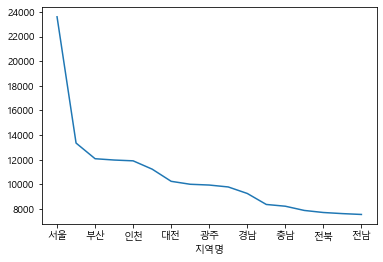

In [34]:
# 지역명으로 분양가격의 평균을 구하고 선그래프 시각화

g = df_last.groupby(["지역명"])["평당분양가격"].mean().sort_values(ascending=False)
g.plot()

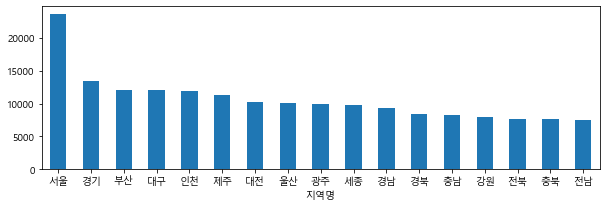

In [35]:
g.plot.bar(rot=0, figsize=(10, 3))

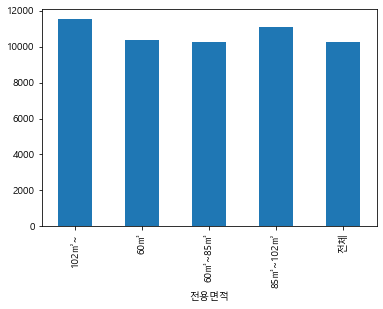

In [36]:
df_last.groupby(["전용면적"])["평당분양가격"].mean().plot.bar()

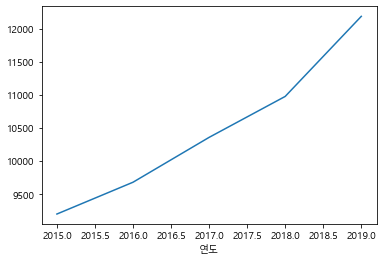

In [37]:
df_last.groupby(["연도"])["평당분양가격"].mean().plot()

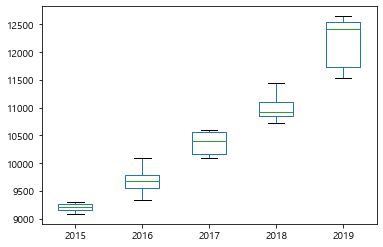

In [38]:
df_last.pivot_table(index="월",columns="연도", values="평당분양가격").plot.box()

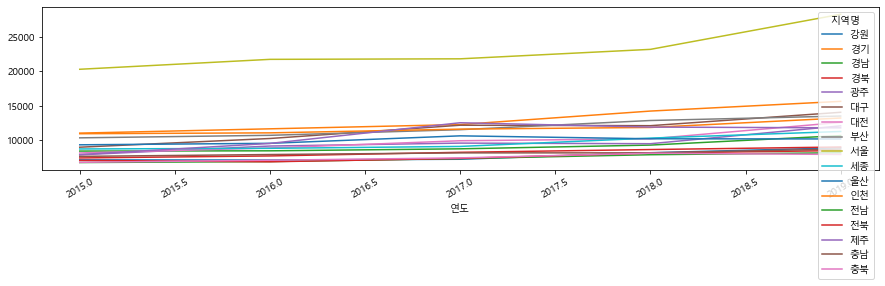

In [39]:
p = df_last.pivot_table(index="연도",columns="지역명", values="평당분양가격")
p.plot(figsize=(15, 3), rot=30)

  # Seaborn으로 시각화

In [40]:
import seaborn as sns
%matplotlib inline

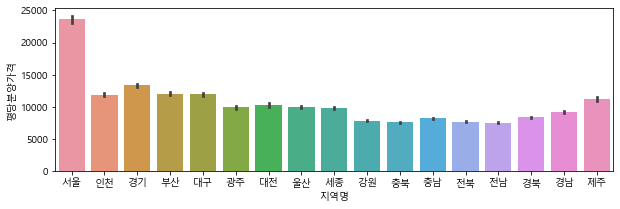

In [41]:
plt.figure(figsize=(10, 3))
sns.barplot(data=df_last, x = "지역명", y="평당분양가격" )

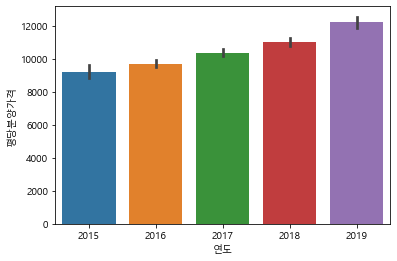

In [42]:
# barplot으로 연도별 평당분양가격

sns.barplot(data=df_last, x="연도", y="평당분양가격" )

https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

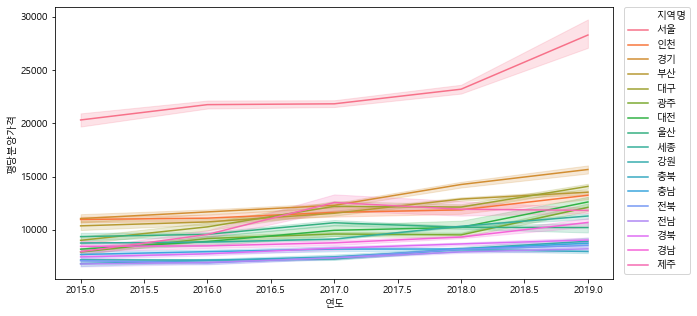

In [43]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_last, x="연도", y="평당분양가격", hue="지역명" )
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

  
    
    

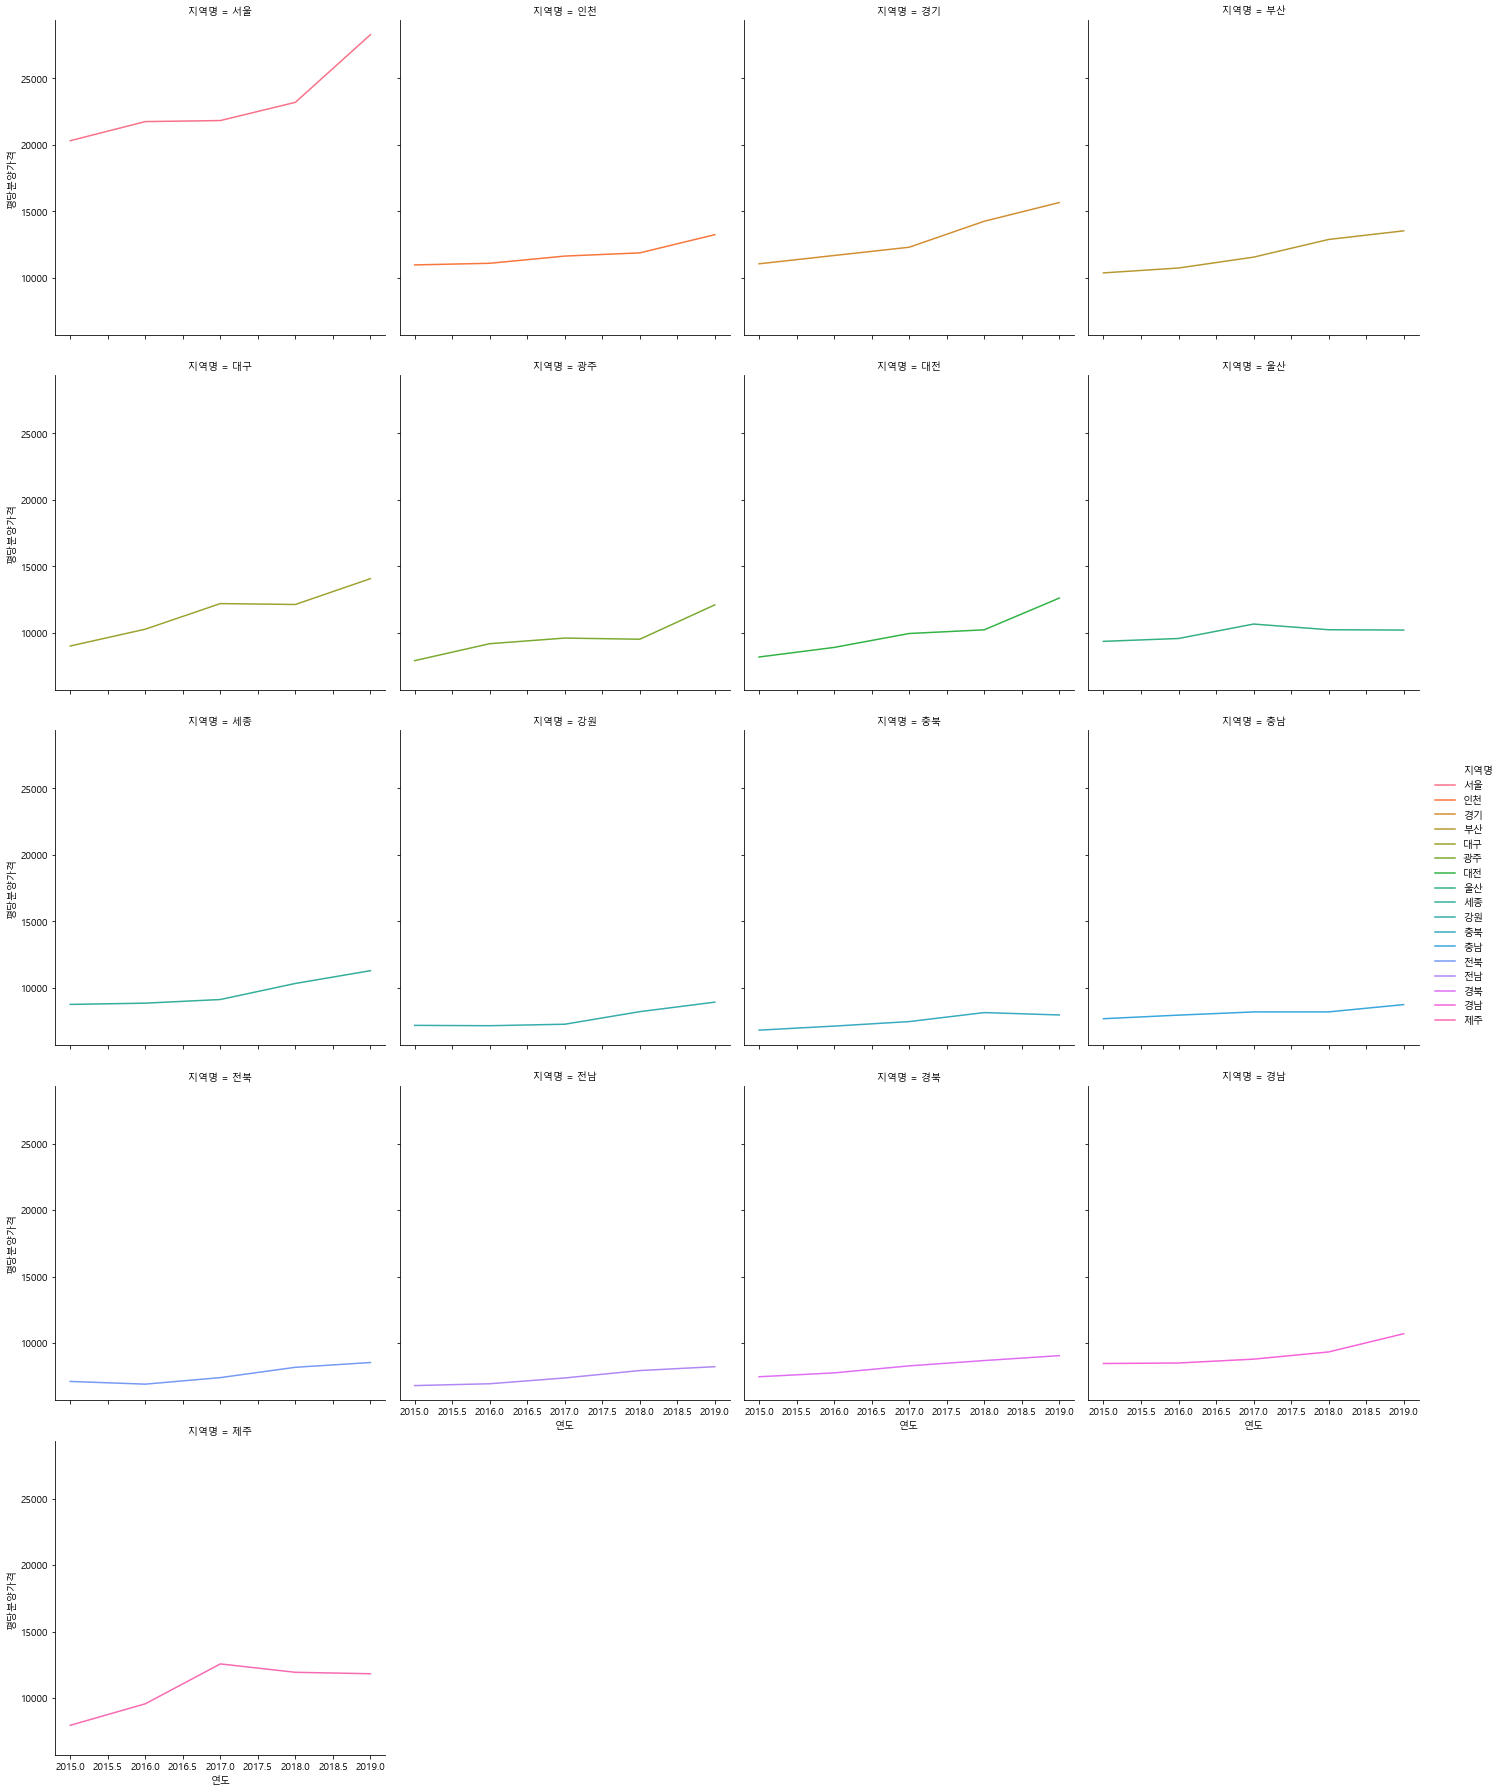

In [44]:
sns.relplot(data=df_last, x="연도",y="평당분양가격", 
            hue="지역명", kind="line", col="지역명", col_wrap=4, ci=None)

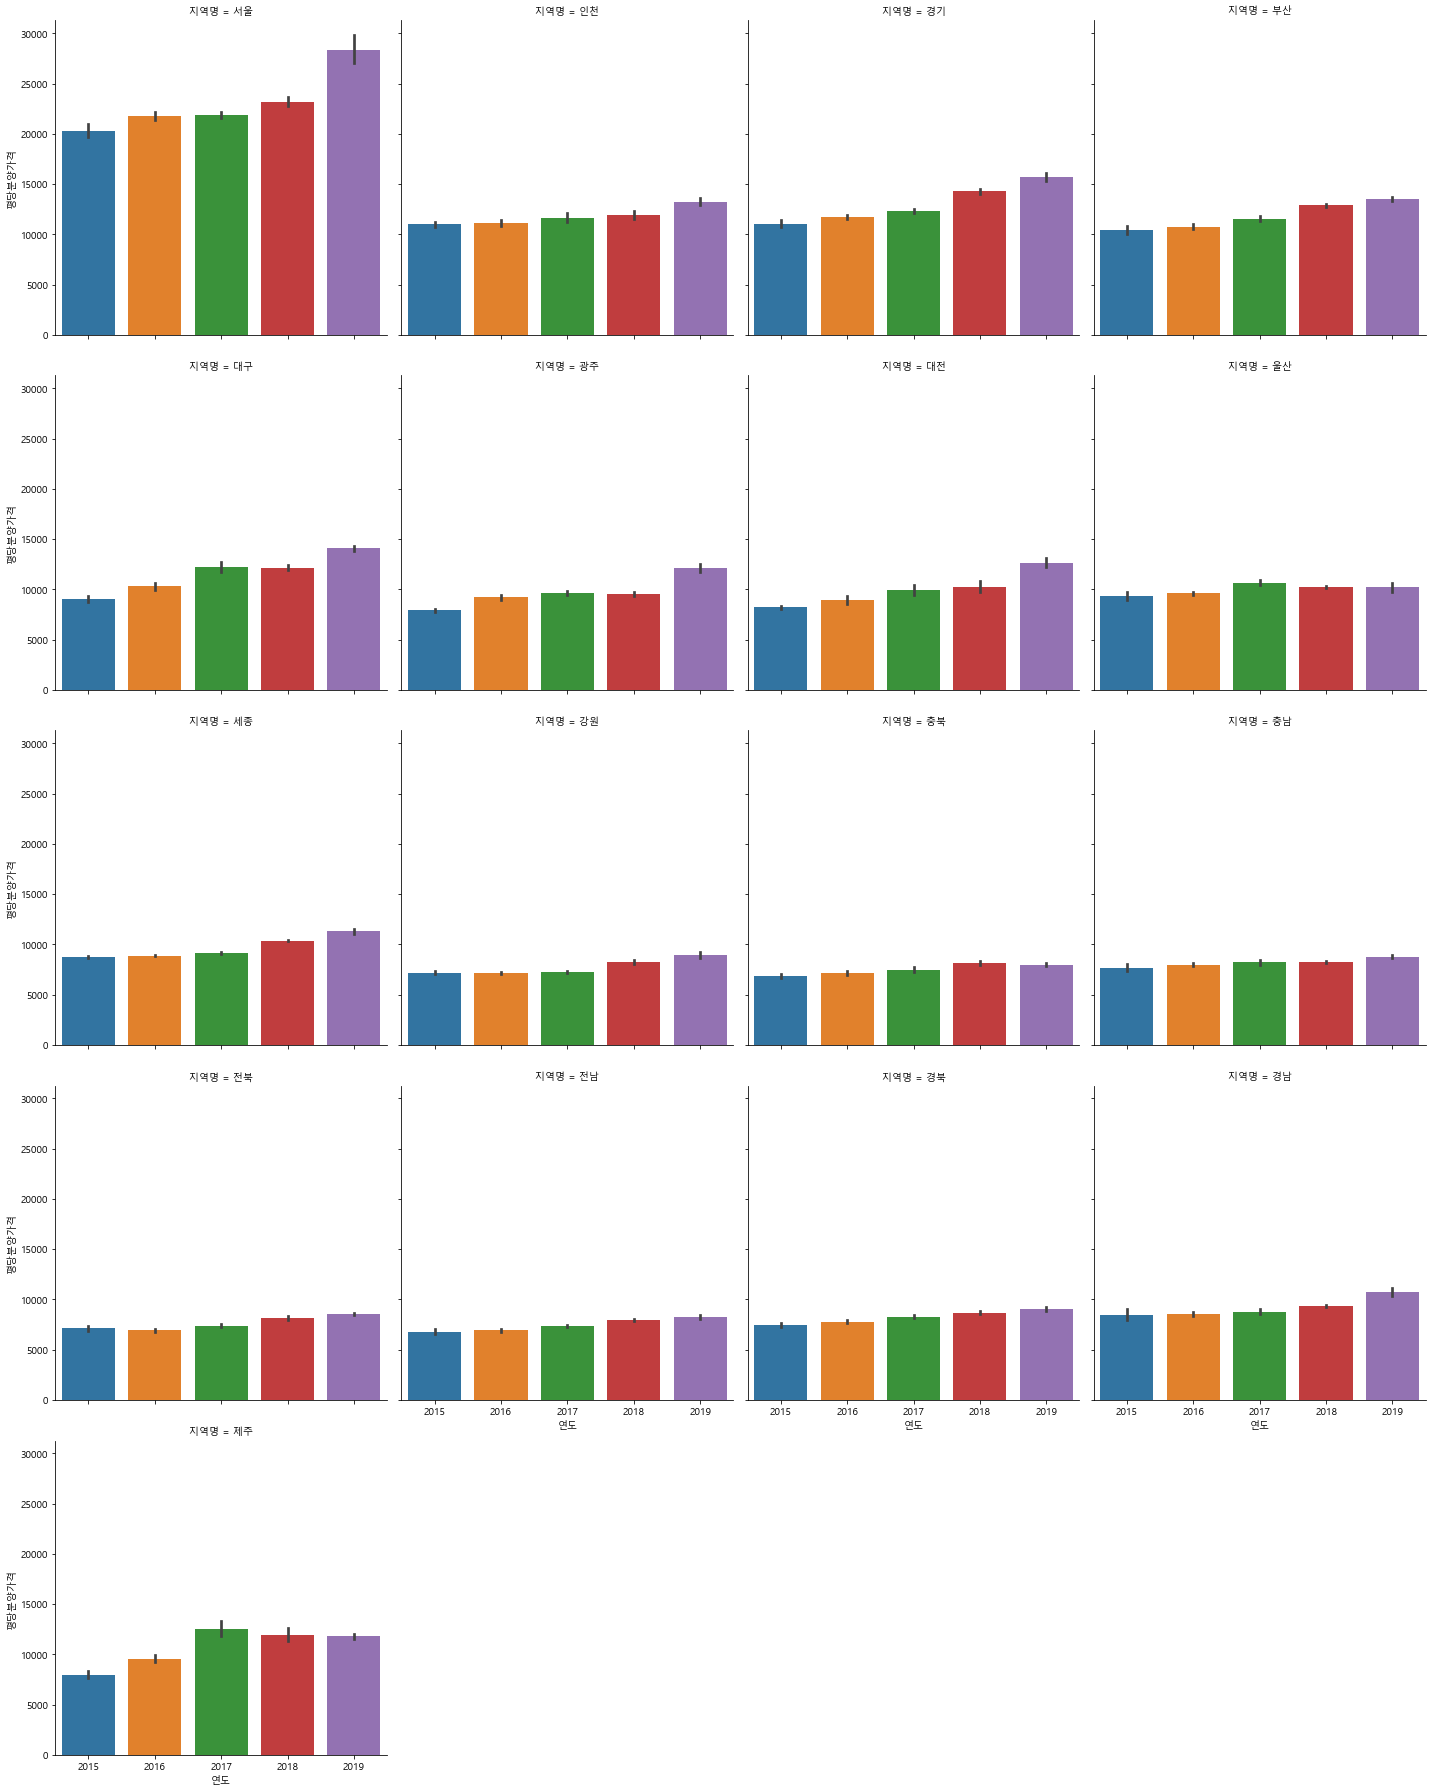

In [45]:
sns.catplot(data=df_last, x="연도", y="평당분양가격", kind="bar", col="지역명", col_wrap=4)

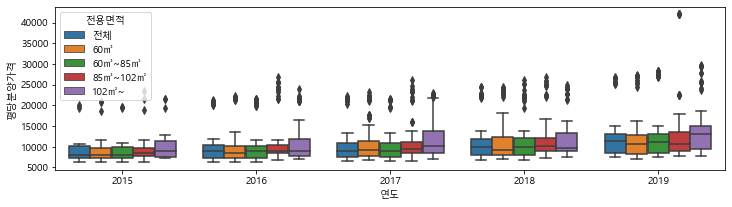

In [46]:
plt.figure(figsize=(12, 3))
sns.boxplot(data=df_last, x="연도", y="평당분양가격",hue="전용면적")

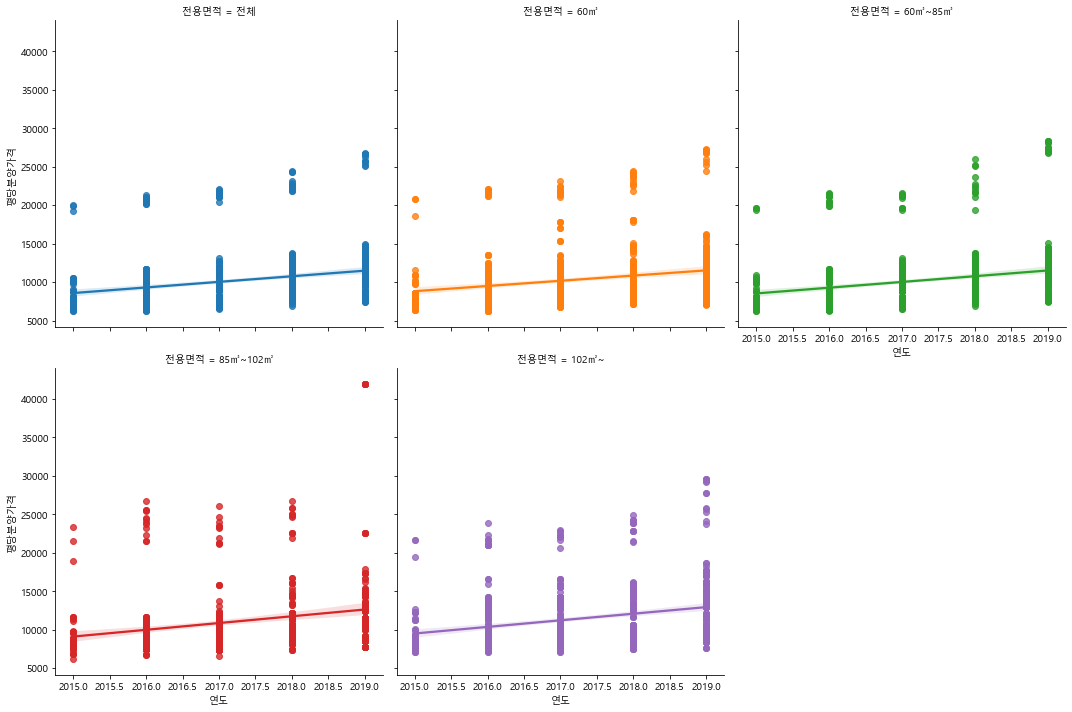

In [47]:
sns.lmplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적",col="전용면적", col_wrap=3)

C:\Users\fxo00\anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\fxo00\anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


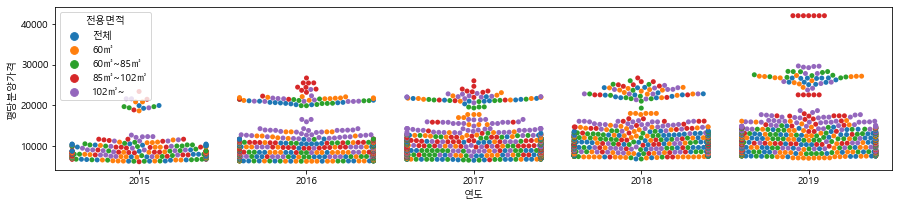

In [48]:
plt.figure(figsize=(15, 3))
sns.swarmplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")

이상치 보기

In [49]:
df_last["평당분양가격"].describe()

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

In [50]:
max_price = df_last["평당분양가격"].max()
max_price

42002.399999999994

In [51]:
df_last[df_last["평당분양가격"] == max_price]


,지역명,연도,월,분양가격,평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85㎡~102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡~102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡~102㎡
3998,서울,2019,9,12728.0,42002.4,85㎡~102㎡
4083,서울,2019,10,12728.0,42002.4,85㎡~102㎡
4168,서울,2019,11,12728.0,42002.4,85㎡~102㎡
4253,서울,2019,12,12728.0,42002.4,85㎡~102㎡


C:\Users\fxo00\anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\fxo00\anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


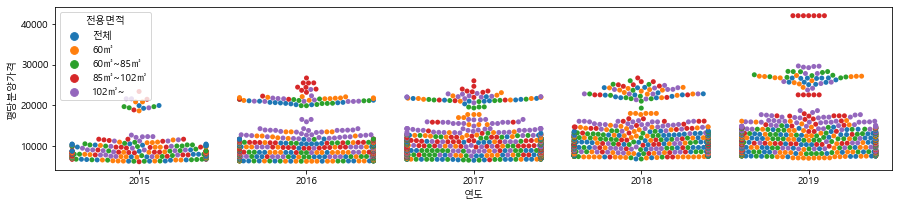

In [52]:
plt.figure(figsize=(15, 3))
sns.swarmplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")

## 이상치 보기

In [53]:
df_last["평당분양가격"].describe()

count     3957.000000
mean     10685.824488
std       4172.222780
min       6164.400000
25%       8055.300000
50%       9484.200000
75%      11751.300000
max      42002.400000
Name: 평당분양가격, dtype: float64

In [54]:
max_price = df_last["평당분양가격"].max()
max_price

42002.399999999994

In [55]:
# 서울의 평당 분양 가격이 특히 높은 데이터가 있다.

df_last[df_last["평당분양가격"] == max_price]

,지역명,연도,월,분양가격,평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85㎡~102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡~102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡~102㎡
3998,서울,2019,9,12728.0,42002.4,85㎡~102㎡
4083,서울,2019,10,12728.0,42002.4,85㎡~102㎡
4168,서울,2019,11,12728.0,42002.4,85㎡~102㎡
4253,서울,2019,12,12728.0,42002.4,85㎡~102㎡


 ## 수치데이터 히스토그램 

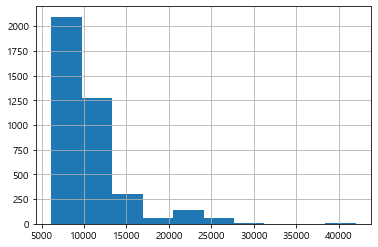

In [56]:
# 결측치가 없는 데이터에서 평당분양가격만 가져온다.

h = df_last["평당분양가격"].hist()

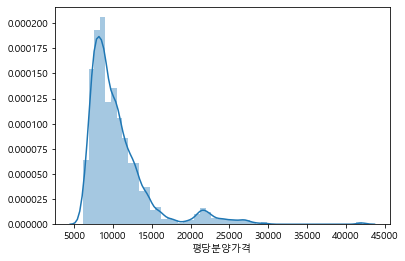

In [57]:
# distplot로 평당분양가격 표현
sns.distplot(df_last["평당분양가격"])

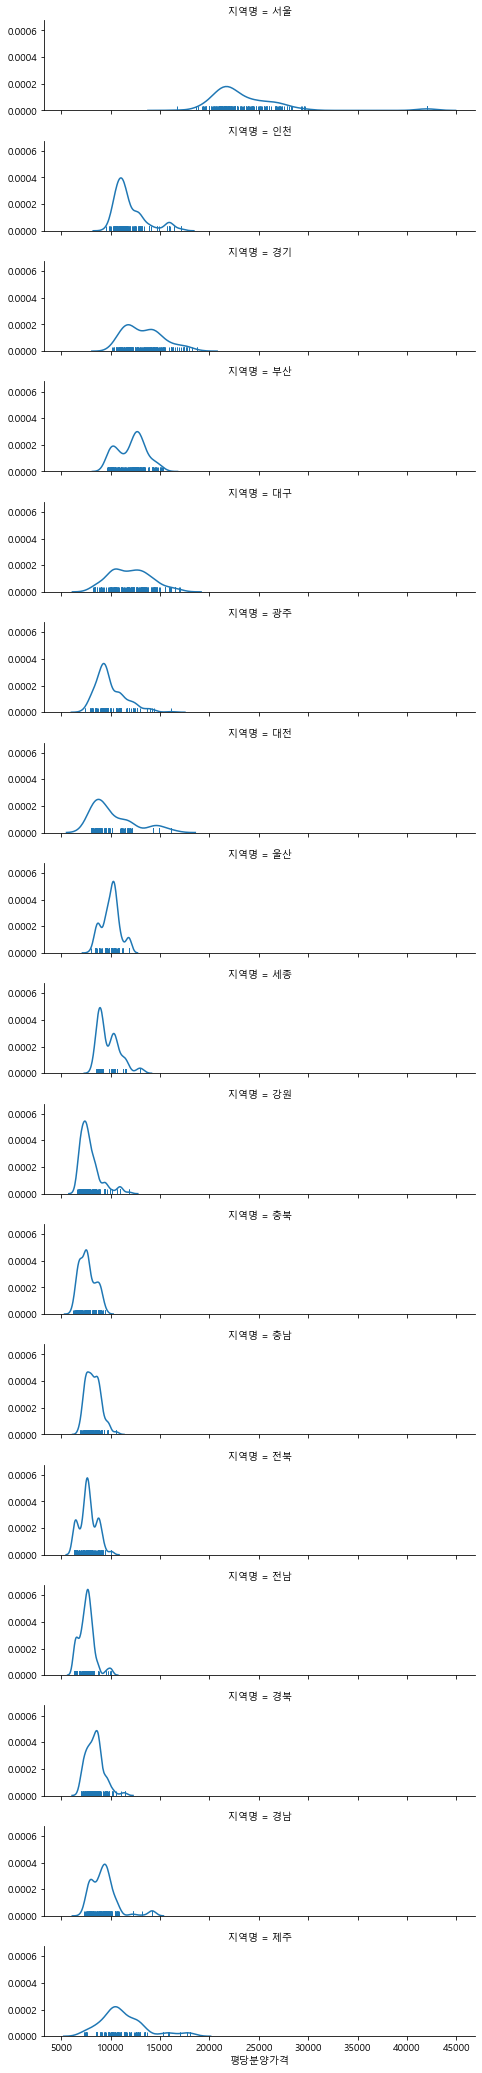

In [58]:
# subplot 표현
g = sns.FacetGrid(df_last, row="지역명", height=1.7, aspect=4,)

g.map(sns.distplot, "평당분양가격", hist=False, rug=True)

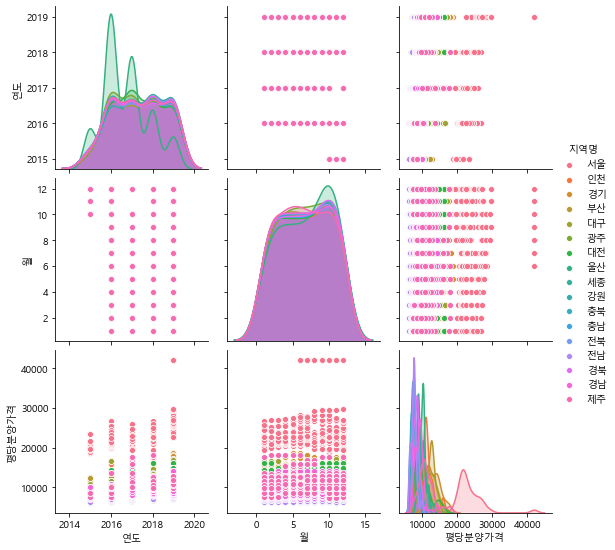

In [59]:
# pairplot
df_last_notnull = df_last.loc[df_last["평당분양가격"].notnull(),
                              ["연도", "월", "평당분양가격", "지역명", "전용면적"]]
sns.pairplot(df_last_notnull, hue="지역명")

In [60]:
# 규모구분(전용면적)별로 value_counts를  사용해서 데이터 집계
df_last["전용면적"].value_counts()

60㎡         867
전체          867
102㎡~       867
85㎡~102㎡    867
60㎡~85㎡     867
Name: 전용면적, dtype: int64

# 2015년 8월 이전 데이터 보기

In [61]:
pd.options.display.max_columns = 25

In [62]:
df_last.head()

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~


In [63]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [64]:
df_first.head(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [65]:
df_first.melt(id_vars="지역", var_name="기간", value_name="평당분양가격")

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [66]:
# 결측치 확인
df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [67]:
date = "2013년12월"

In [68]:
date.split("년")

['2013', '12월']

In [69]:
date.split("년")[-1].replace("월", "")

'12'

In [70]:
def parse_year(date):
    year = date.split("년")[0]
    year = int(year)
    return year

y = parse_year(date)
print(type(y))

<class 'int'>


In [71]:
parse_year(date)

2013

In [72]:
def parse_month(date):
    month = date.split("년")[-1].replace("월", "")
    month = int(month)
    return month

parse_month(date)

12

In [73]:
df_first_melt["기간"].apply(parse_year)

NameError: name 'df_first_melt' is not defined

In [74]:
 df_last.sample()

,지역명,연도,월,분양가격,평당분양가격,전용면적
4298,강원,2019,12,3329.0,10985.7,85㎡~102㎡


In [75]:
df_last[df_last["전용면적"] == "전체"]

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
5,인천,2015,10,3163.0,10437.9,전체
10,경기,2015,10,3138.0,10355.4,전체
15,부산,2015,10,3112.0,10269.6,전체
20,대구,2015,10,2682.0,8850.6,전체
...,...,...,...,...,...,...
4310,전북,2019,12,2468.0,8144.4,전체
4315,전남,2019,12,2452.0,8091.6,전체
4320,경북,2019,12,2914.0,9616.2,전체
4325,경남,2019,12,3063.0,10107.9,전체


In [76]:
df_last.columns.to_list()

['지역명', '연도', '월', '분양가격', '평당분양가격', '전용면적']

In [78]:
cols = ['지역명', '연도', '월',  '평당분양가격']
cols

['지역명', '연도', '월', '평당분양가격']

In [84]:
df_last_prepare = df_last.loc[df_last["전용면적"] == "전체", cols].copy()
df_last_prepare.head(1)

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3


In [86]:
df = pd.concat([df_first_prepare, df_last_prepare])
df.shape

NameError: name 'df_first_prepare' is not defined

In [87]:
df.head()


NameError: name 'df' is not defined

In [88]:
df["연도"].value_counts(sort=False)

NameError: name 'df' is not defined

## pivot_table 사용하기 

In [90]:
t = pd.pivot_table(df, index="연도", columns="지역명", values="평당분양가격").round()
t




NameError: name 'df' is not defined

In [91]:
plt.figure(figsize=(15,  7))
sns.heatmap(t, cmap="Blues", annot=True, fmt=".0f")



NameError: name 't' is not defined

<Figure size 864x504 with 0 Axes>

In [ ]:
# transpose 사용하면 행과 열을 바꿔줄 수 있다

t.transpose()

In [ ]:
plt.figure(figsize=(15,  7))
sns.heatmap(t.T, cmap="Blues", annot=True, fmt=".0f")

In [ ]:
# Groupby 

g = df.groupby(["연도", "지역명"])["평당분양가격"].mean().unstack().round()
g

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(g.T,annot=True, fmt=".0f", cmap="Greens")


In [ ]:
# barplot으로 연도별 평당분양가격 그리기
sns.barplot(data=df, x="연도", y="평당분양가격")


In [92]:
# pointplot 으로 연도별 평당 분양가격 

plt.figure(figsize(12, 4))
sns.pointplot(data=df, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor(1.02, 1), loc=2, borderaxespad=0)

NameError: name 'figsize' is not defined

In [ ]:
# 서울만 barplot

df_seoul = df[df["지역명"] == "서울"].copy()
print(df_seoul.shape)

g = sns.barplot(data=df_seoul, x="연도", y="평당분양가격"


In [ ]:
# 연도별 평당분양가격 boxplot

sns.boxplot(data=df, x="연도", y="평당분양가격")



In [ ]:
sns.boxenplot(data=df, x="연도", y="평당분양가격")


In [ ]:
plt.figure(figsize(10, 4))
sns.violinplot(data=df, x="연도", y="평당분양가격")

In [ ]:
# 연도별 평당분양가격 swarmplot

plt.figure(figsize=(12, 5))
sns.swarmplot(data=df, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor(1.02, 1), loc=2, borderaxespad=0)



In [ ]:
plt.figure(figsize=(12, 5))
sns.violinplot(data=df, x="연도", y="평당분양가격")
sns.swarmplot(data=df, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor(1.02, 1), loc=2, borderaxespad=0)


In [ ]:
# barplot 으로 지역별 평당분양가격 

plt.figure(figsize(12, 4))
sns.barplot(data=df, x="지역명", y="평당분양가격")



In [ ]:
# boxplot 으로 지역별 평당분양가격

plt.figure(figsize(12, 4))
sns.boxplot(data=df, x="지역명", y="평당분양가격")


In [ ]:
plt.figure(figsize(12, 4))
sns.boxplot(data=df, x="지역명", y="평당분양가격")

In [ ]:
# violinplot으로 지역별 평당분양가격

plt.figure(figsize(25, 4))
sns.violinplot(data=df, x="지역명", y="평당분양가격")

In [ ]:
# swarmplot으로 지역별 평당분양가격

plt.figure(figsize(25, 4))
sns.swarmplot(data=df, x="지역명", y="평당분양가격")